In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the files

In [173]:
data_train = pd.read_excel('Data_Train.xlsx')
data_test = pd.read_excel('Test_set.xlsx')
data_submission = pd.read_excel('Sample_submission.xlsx')

In [174]:
# Train Data
data_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [175]:
data_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [176]:
data_submission.head(3)

,Price
0,15998
1,16612
2,25572


### EDA

In [177]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [178]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [179]:
data_train.describe(include=object).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


Inferences:
1. There is 1 data missing in route and total stops.
2. Out of 12 unique airlines Jet Airways is more frequent
3. For most of the airlines Source is delhi and destination is cochin
4. Most frequent route is Del->Bom->Cok 
5. Most of the flights have 1 stop

In [180]:
# Visualization

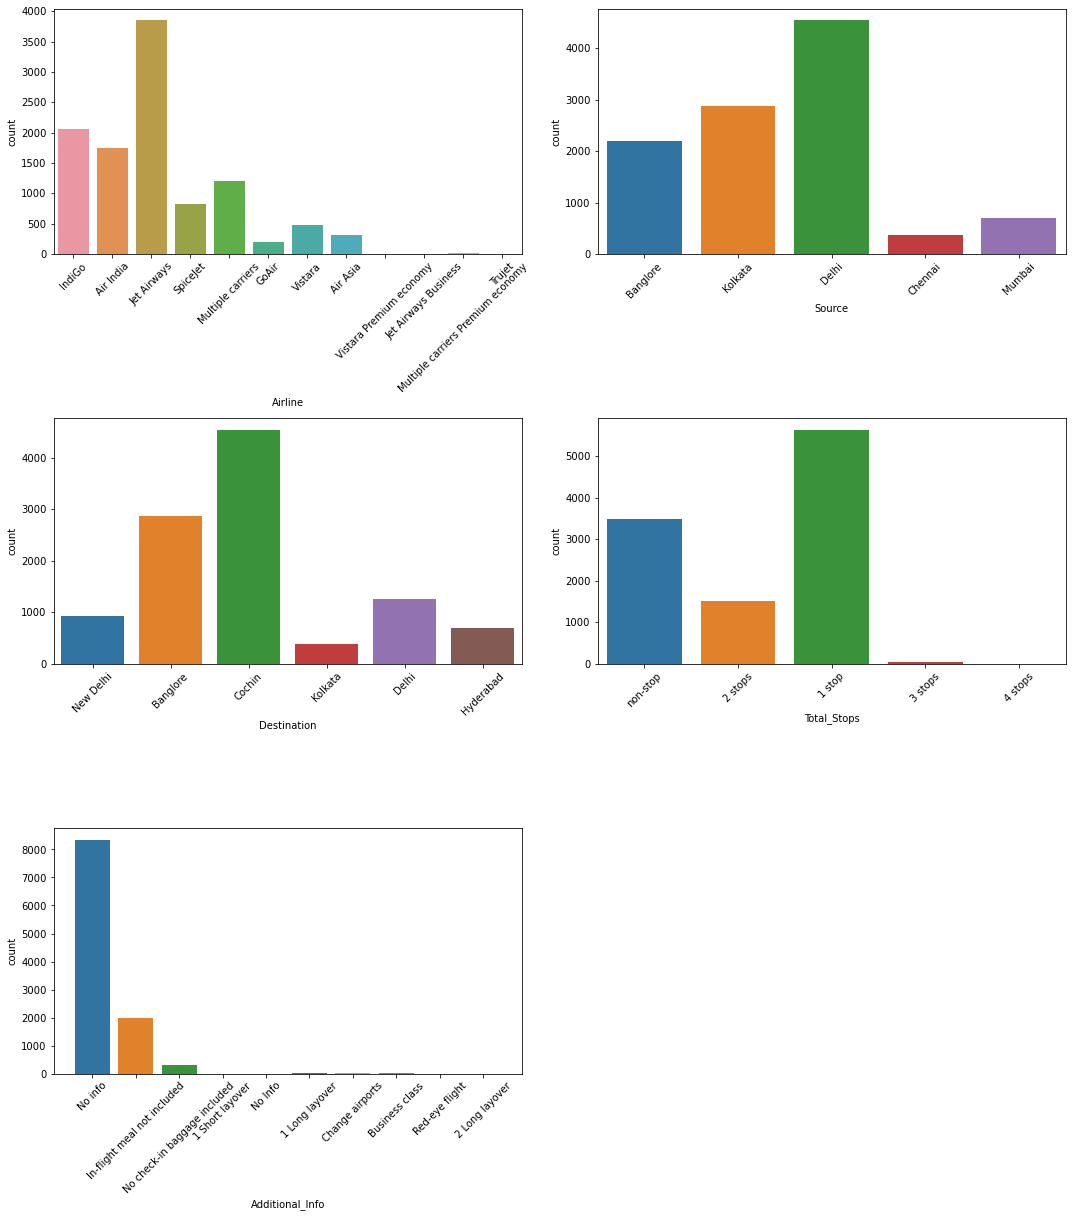

In [181]:
t=1
plt.figure(figsize=(15,17))
for i in ['Airline','Source','Destination','Total_Stops','Additional_Info']:
    plt.subplot(3,2,t)
    sns.countplot(x=data_train[i])
    plt.xticks(rotation=45)
    t+=1
plt.plot()
plt.tight_layout()

Key observations:
1. There is duplicate category in destination Delhi and New Delhi.
2. There is duplicate category in Additional info, No info and No Info.

In [182]:
# Lets explore routes
data_train['Route'].value_counts().head(5).sum()

6252

In [183]:
6252/data_train.shape[0]

0.5852288682954226

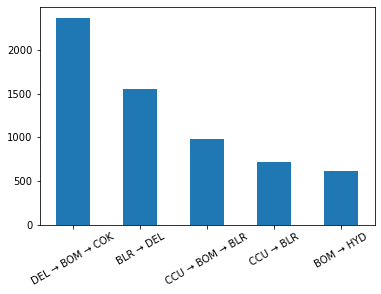

In [184]:
data_train['Route'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

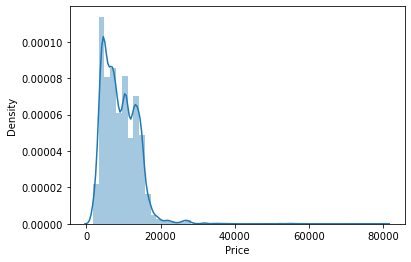

In [185]:
# Lets explore price column
sns.distplot(data_train['Price'])
plt.show()

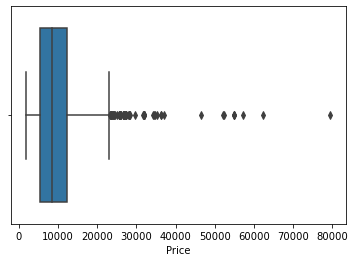

In [186]:
# Lets explore price column
sns.boxplot(x=data_train['Price'])
plt.show()

Inferences:
1. There is 1 data missing in route and total stops.
2. Out of 12 unique airlines Jet Airways is more frequent
3. For most of the airlines Source is delhi and destination is cochin
4. Most frequent route is Del->Bom->Cok 
5. Most of the flights have 1 stop

Key observations:
1. There is duplicate category in destination Delhi and New Delhi.
2. There is duplicate category in Additional info, No info and No Info.
3. Top 5 routes have ~60% of data

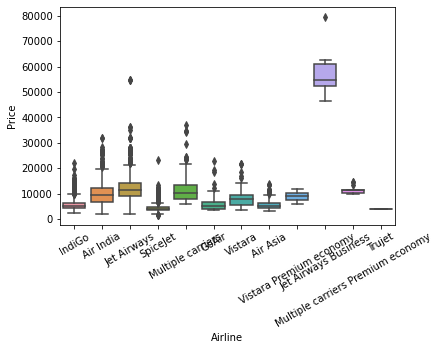

In [187]:
# Bivariate Analysis

# Lets explore effect of airline on price

sns.boxplot(x=data_train['Airline'],y=data_train['Price'])
plt.xticks(rotation=30)
plt.show()

In [188]:
# Airline vs price (ANOVA, Krsukal-Wallis)

In [189]:
from scipy.stats import shapiro, jarque_bera,kruskal

In [190]:
# Assupmtion 1: The come comes from normal distribution

# Ho: The data is normal
# Ha: The data is not normal
shapiro(data_train['Price'])

ShapiroResult(statistic=0.8955856561660767, pvalue=0.0)

In [191]:
jarque_bera(data_train['Price'])

SignificanceResult(statistic=84545.14317610116, pvalue=0.0)

In [192]:
# The data is not normal

In [193]:
data_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [194]:
# We have to go with Non parametric test Kruskal Wallis
# Ho: Airline has no affect on price
# Ha: Atleast one airline has different price

s1 = data_train[data_train['Airline']=='IndiGo']['Price']
s2 = data_train[data_train['Airline']=='Air India']['Price']
s3 = data_train[data_train['Airline']=='Jet Airways']['Price']
s4 = data_train[data_train['Airline']=='Multiple carriers']['Price']
s5 = data_train[data_train['Airline']=='GoAir']['Price']
s6 = data_train[data_train['Airline']=='Vistara']['Price']
s7 = data_train[data_train['Airline']=='Air Asia']['Price']
s8 = data_train[data_train['Airline']=='Vistara Premium economy']['Price']
s9 = data_train[data_train['Airline']=='Jet Airways Business']['Price']
s10 = data_train[data_train['Airline']=='Multiple carriers Premium economy']['Price']
s11= data_train[data_train['Airline']=='Trujet']['Price']
s12 = data_train[data_train['Airline']=='SpiceJet']['Price']

In [195]:
kruskal(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12)

KruskalResult(statistic=4870.593769019019, pvalue=0.0)

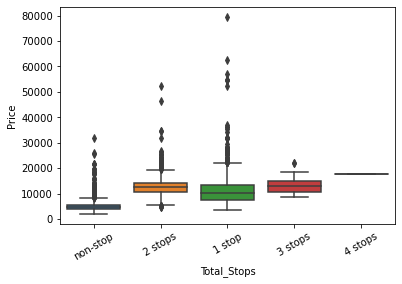

In [196]:
# Lets explore effect of total_stops on price

sns.boxplot(x=data_train['Total_Stops'],y=data_train['Price'])
plt.xticks(rotation=30)
plt.show()

In [197]:
# Lets proove this fact statistically

data_train['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [198]:
sample = []
for i in ['non-stop', '2 stops', '1 stop', '3 stops']:
    s = data_train[data_train['Total_Stops']==i]['Price']
    sample.append(s)

In [199]:
kruskal(sample[0],sample[1],sample[2],sample[3])

KruskalResult(statistic=5749.236822864575, pvalue=0.0)

Inference:
1. Flight price is affectd by Airline and Total Stops

## Data Preprocessing

In [200]:
# Combine the dataset
data = pd.concat([data_train,data_test],axis=0)

In [201]:
data.shape

(13354, 11)

In [202]:
# treat the missing values
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [203]:
data[(data['Route'].isnull())|(data['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [204]:
# We can drop this row
data.drop(index=[9039],inplace=True)

In [205]:
# Treat the outliers

# There are outliers in price but we decide to keep it in the data as it seems to be genuine.

In [206]:
data['Price'].max()

79512.0

In [207]:
data[data['Price']==data['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0


In [208]:
data[data['Airline']=='Jet Airways Business']['Price']

657      52229.0
2924     79512.0
5372     62427.0
7351     46490.0
9715     52285.0
10364    57209.0
1802         NaN
1819         NaN
Name: Price, dtype: float64

### Feature Engineering

* Generating some new feature using the exsiting ones.
* Encoding category columns

### Airline

In [209]:
map_airline = data_train['Airline'].value_counts(normalize=True).to_dict()

In [210]:
data['Airline'] = data['Airline'].map(map_airline)

In [211]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.192174,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,0.163999,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,0.360292,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0


### Date of journey

In [212]:


data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],
                                        format='%d/%m/%Y')

In [213]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.192174,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,0.163999,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,0.360292,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,0.192174,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,0.192174,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [214]:
data['Day_of_journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month
data['Weekday_of_Journey'] = data['Date_of_Journey'].dt.weekday

In [215]:
data.drop(columns=['Date_of_Journey'],inplace=True)

In [216]:
data.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey
0,0.192174,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,0.192174,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,0.192174,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4
5,0.076570,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,6,0
6,0.360292,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,3,1
7,0.360292,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,1,3,4
8,0.360292,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,3,1
9,0.111954,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,5,0


### Source and Destination

In [217]:
data['Source'].value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [218]:
data['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [219]:
data['Destination'] = data['Destination'].replace('New Delhi','Delhi')

In [220]:
data['Source_to_Destination'] = data['Source']+'-'+data['Destination']

In [221]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,Banglore-Delhi
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,Kolkata-Banglore
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,Delhi-Cochin


In [222]:
map_sd = data[data['Price'].notnull()]['Source_to_Destination'].\
value_counts(normalize=True).to_dict()

In [223]:
data['Source_to_Destination'] = data['Source_to_Destination'].map(map_sd)

In [224]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [225]:
data.drop(columns=['Source','Destination'],inplace=True)

In [226]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


### Route

In [227]:
busy_routes = data_train['Route'].value_counts().head(5).index

In [228]:
busy_routes

Index(['DEL → BOM → COK', 'BLR → DEL', 'CCU → BOM → BLR', 'CCU → BLR',
       'BOM → HYD'],
      dtype='object')

In [229]:
data['Route'] = data['Route'].apply(lambda r: 1 if r in busy_routes else 0)

In [230]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


### Dep Time and Arrival Time

In [231]:
data['Dep_Time'] = data['Dep_Time'].str.split(':',expand=True)[0].astype(int)

In [232]:
data['Arrival_Time'] = data['Arrival_Time'].str.split(':',expand=True)[0].astype(int)

In [233]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,22,1,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,5,13,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,9,4,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,18,23,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,16,21,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


In [234]:
def hour_to_cat(h):
    if h<=4:
        return 5
    elif h<=8:
        return 0
    elif h<=12:
        return 1
    elif h<=16:
        return 2
    elif h<=20:
        return 3
    else:
        return 4

In [235]:
data['Dep_Time'] = data['Dep_Time'].apply(hour_to_cat)
data['Arrival_Time'] = data['Arrival_Time'].apply(hour_to_cat)

In [236]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,19h,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673


### Duration

In [237]:
data[['Dur_h','Dur_m']] = data['Duration'].str.split(expand=True)

In [238]:
data

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination,Dur_h,Dur_m
0,0.192174,1,4,5,2h 50m,non-stop,No info,3897.0,24,3,6,0.205673,2h,50m
1,0.163999,0,0,2,7h 25m,2 stops,No info,7662.0,1,5,2,0.268770,7h,25m
2,0.360292,0,1,5,19h,2 stops,No info,13882.0,9,6,6,0.424640,19h,None
3,0.192174,0,3,4,5h 25m,1 stop,No info,6218.0,12,5,6,0.268770,5h,25m
4,0.192174,0,2,4,4h 45m,1 stop,No info,13302.0,1,3,4,0.205673,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,0,3,3,23h 55m,1 stop,No info,NaN,6,6,3,0.268770,23h,55m
2667,0.192174,1,2,2,2h 35m,non-stop,No info,NaN,27,3,2,0.268770,2h,35m
2668,0.360292,1,4,5,6h 35m,1 stop,No info,NaN,6,3,2,0.424640,6h,35m
2669,0.163999,1,5,3,15h 15m,1 stop,No info,NaN,6,3,2,0.424640,15h,15m


In [239]:
data['Dur_h'].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In [240]:
data[data['Duration']=='5m']

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination,Dur_h,Dur_m
6474,0.163999,0,2,2,5m,2 stops,No info,17327.0,6,3,2,0.06525,5m,None
2660,0.163999,0,2,2,5m,2 stops,No info,NaN,12,3,1,0.06525,5m,None


In [241]:
data['Dur_h'] = data['Dur_h'].str.rstrip('hm').astype(int)

In [243]:
data['Dur_m'].fillna('0',inplace=True)

In [245]:
data['Dur_m']=data['Dur_m'].str.rstrip('m').astype(int)

In [246]:
data['Duration'] = data['Dur_h']*60 + data['Dur_m']

In [248]:
data.drop(columns=['Dur_h','Dur_m'],inplace=True)

In [249]:
data.head()

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,non-stop,No info,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2 stops,No info,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2 stops,No info,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1 stop,No info,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1 stop,No info,13302.0,1,3,4,0.205673


### Total_Stops

In [252]:
data['Total_Stops'] = data['Total_Stops'].str.split(expand=True)[0]

In [254]:
data['Total_Stops'] = np.where(data['Total_Stops']=='non-stop','0',data['Total_Stops'])

In [255]:
data['Total_Stops']= data['Total_Stops'].astype(int)

In [256]:
data['Total_Stops'].value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

### Additional Info

In [257]:
data['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [259]:
data['Additional_Info'] = data['Additional_Info']\
.apply(lambda info: 0 if info in ['No info','No Info'] else 1)

### Final data

In [260]:
data.head(10)

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,0,0,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2,0,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2,0,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1,0,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1,0,13302.0,1,3,4,0.205673
5,0.076570,1,1,1,145,0,0,3873.0,24,6,0,0.268770
6,0.360292,0,3,1,930,1,1,11087.0,12,3,1,0.205673
7,0.360292,0,0,0,1265,1,0,22270.0,1,3,4,0.205673
8,0.360292,0,0,1,1530,1,1,11087.0,12,3,1,0.205673
9,0.111954,1,1,3,470,1,0,8625.0,27,5,0,0.424640


## Train Test Split

In [263]:
train_set = data[data['Price'].notnull()]
test_set = data[data['Price'].isnull()]

In [264]:
train_set

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.192174,1,4,5,170,0,0,3897.0,24,3,6,0.205673
1,0.163999,0,0,2,445,2,0,7662.0,1,5,2,0.268770
2,0.360292,0,1,5,1140,2,0,13882.0,9,6,6,0.424640
3,0.192174,0,3,4,325,1,0,6218.0,12,5,6,0.268770
4,0.192174,0,2,4,285,1,0,13302.0,1,3,4,0.205673
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.029861,1,3,4,150,0,0,4107.0,9,4,1,0.268770
10679,0.163999,1,3,4,155,0,0,4145.0,27,4,5,0.268770
10680,0.360292,1,0,1,180,0,0,7229.0,27,4,5,0.205673
10681,0.044838,1,1,2,160,0,0,12648.0,1,3,4,0.205673


In [266]:
test_set.drop(columns=['Price'],inplace=True)
test_set

,Airline,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_journey,Month_of_Journey,Weekday_of_Journey,Source_to_Destination
0,0.360292,1,3,5,655,1,0,6,6,3,0.424640
1,0.192174,0,0,1,240,1,0,12,5,6,0.268770
2,0.360292,1,3,3,1425,1,1,21,5,1,0.424640
3,0.111954,1,0,4,780,1,0,21,5,1,0.424640
4,0.029861,1,4,5,170,0,0,24,6,0,0.205673
...,...,...,...,...,...,...,...,...,...,...,...
2666,0.163999,0,3,3,1435,1,0,6,6,3,0.268770
2667,0.192174,1,2,2,155,0,0,27,3,2,0.268770
2668,0.360292,1,4,5,395,1,0,6,3,2,0.424640
2669,0.163999,1,5,3,915,1,0,6,3,2,0.424640


In [267]:
# train test split on train_set

In [269]:
from sklearn.model_selection import train_test_split

In [268]:
y = train_set['Price']
x = train_set.drop(columns='Price')

In [270]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [271]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8545, 11) (2137, 11) (8545,) (2137,)


## Predictive Modeling

In [272]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [274]:
def hack_eval(y_true,y_pred):
    scor = 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    return scor

In [276]:
r2 = []
ms_error = []
rms_error = []
map_error = []
fit_model = []
hack_score = [] 

def model_evaluation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    
    print('R2',r2_score(ytest,pred))
    print('MSE',mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)))
    print('MAPE',mean_absolute_percentage_error(ytest,pred))
    print('Hack Score',hack_eval(ytest,pred))
    
    inp = input('Do you want to save this model? Y/N')
    if inp.lower()=='y':
        fit_model.append(str(m))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rms_error.append(np.sqrt(mean_squared_error(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))
        
        global score_card
        score_card = pd.DataFrame({'Model':fit_model,
                                  'R2':r2,
                                  'MSE':ms_error,
                                  'RMSE':rms_error,
                                  'MAPE':map_error,
                                  'Hachathon Score':hack_score})
    else:
        return

### Linear Regression

In [277]:
model_evaluation(LinearRegression(),x_train,y_train,x_test,y_test)

R2 0.49605673287692054
MSE 11209267.615819253
RMSE 3348.0244347703397
MAPE 0.2717233415748326
Hack Score 0.852277584821571
Do you want to save this model? Y/Ny


In [278]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278


### Ridge and Lasso

In [282]:
model_evaluation(Ridge(alpha=0.1),x_train,y_train,x_test,y_test)

R2 0.4960527100753931
MSE 11209357.095452834
RMSE 3348.0377977933335
MAPE 0.2717120186573435
Hack Score 0.8523504298618132
Do you want to save this model? Y/Ny


In [284]:
model_evaluation(Lasso(alpha=1),x_train,y_train,x_test,y_test)

R2 0.49608915179655044
MSE 11208546.518089302
RMSE 3347.9167430044167
MAPE 0.27164738612046074
Hack Score 0.839421780495631
Do you want to save this model? Y/Ny


In [285]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422


## Decision tree

In [288]:
model_evaluation(DecisionTreeRegressor(max_depth=9),
                x_train,y_train,x_test,y_test)

R2 0.7850073818522867
MSE 4782105.346899652
RMSE 2186.8025395310965
MAPE 0.12759190009592236
Hack Score 0.9180182975938433
Do you want to save this model? Y/Ny


In [289]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018


### Random Forest

In [293]:
model_evaluation(RandomForestRegressor(n_estimators=100,max_depth=10),
                x_train,y_train,x_test,y_test)

R2 0.8435738776024712
MSE 3479404.0965539
RMSE 1865.3160848912175
MAPE 0.09952583913502426
Hack Score 0.9336397954608795
Do you want to save this model? Y/Ny


In [294]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640


### AdaBoost

In [298]:
model_evaluation(AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=3),n_estimators=200),
                x_train,y_train,x_test,y_test)

R2 0.5686697853249254
MSE 9594127.2014273
RMSE 3097.438813185387
MAPE 0.30129481758571086
Hack Score 0.8562373947473837
Do you want to save this model? Y/Ny


In [299]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237


### Gradient Boosting

In [306]:
model_evaluation(GradientBoostingRegressor(max_depth=7,n_estimators=150),
                x_train,y_train,x_test,y_test)

R2 0.8826650293463314
MSE 2609895.1460542995
RMSE 1615.5169903329088
MAPE 0.08950672257983228
Hack Score 0.940899448049835
Do you want to save this model? Y/Ny


In [307]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882665,2.609895e+06,1615.516990,0.089507,0.940899


### XGBoost

In [313]:
model_evaluation(XGBRegressor(n_estimators=130,max_depth=8),
                x_train,y_train,x_test,y_test)

R2 0.8910308912801614
MSE 2423812.324095705
RMSE 1556.8597637859696
MAPE 0.08060207998321352
Hack Score 0.9426880897140467
Do you want to save this model? Y/Ny


In [314]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882665,2.609895e+06,1615.516990,0.089507,0.940899
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688


### Voting

In [317]:
base_models = [('DT',DecisionTreeRegressor(max_depth=10)),
              ('RF',RandomForestRegressor(n_estimators=130,max_depth=9)),
              ('GBR',GradientBoostingRegressor(max_depth=9,n_estimators=130)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [318]:
model_evaluation(VotingRegressor(base_models),
                x_train,y_train,x_test,y_test)

R2 0.8680029596870538
MSE 2936025.2351630935
RMSE 1713.4833629665313
MAPE 0.08931092818865596
Hack Score 0.9389505147763878
Do you want to save this model? Y/Ny


In [319]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882665,2.609895e+06,1615.516990,0.089507,0.940899
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688
8,"VotingRegressor(estimators=[('DT', DecisionTre...",0.868003,2.936025e+06,1713.483363,0.089311,0.938951


### Stacking

In [322]:
base_models = [('DT1',DecisionTreeRegressor(max_depth=10)),
               ('DT2',DecisionTreeRegressor(max_depth=9)),
              ('RF1',RandomForestRegressor(n_estimators=130,max_depth=9)),
               ('RF2',RandomForestRegressor(n_estimators=150,max_depth=8)),
              ('GBR',GradientBoostingRegressor(max_depth=9,n_estimators=130)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [325]:
model_evaluation(StackingRegressor(estimators=base_models,final_estimator=(DecisionTreeRegressor(max_depth=5))),
                x_train,y_train,x_test,y_test)

R2 0.8790058374577744
MSE 2691286.9689287837
RMSE 1640.5142391728223
MAPE 0.08736566445335962
Hack Score 0.9403388471204674
Do you want to save this model? Y/Ny


### Final Score Card

In [326]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882665,2.609895e+06,1615.516990,0.089507,0.940899
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688
8,"VotingRegressor(estimators=[('DT', DecisionTre...",0.868003,2.936025e+06,1713.483363,0.089311,0.938951
9,"StackingRegressor(estimators=[('DT1', Decision...",0.892044,2.401286e+06,1549.608366,0.080947,0.943050


### Lets tune XGBRegrssor

In [331]:
param = {'n_estimators':[130,150,170],
        'max_depth':[8,9,10,11,12],
        'gamma':[0,1]}

In [332]:
from sklearn.model_selection import GridSearchCV

In [333]:
gscv = GridSearchCV(estimator=XGBRegressor(),
                   param_grid=param,
                   scoring='r2',
                   verbose=3,
                   cv=5)

In [334]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.892 total time=   0.3s
[CV 2/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.893 total time=   0.2s
[CV 3/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.903 total time=   0.3s
[CV 4/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.853 total time=   0.3s
[CV 5/5] END gamma=0, max_depth=8, n_estimators=130;, score=0.908 total time=   0.3s
[CV 1/5] END gamma=0, max_depth=8, n_estimators=150;, score=0.891 total time=   0.3s
[CV 2/5] END gamma=0, max_depth=8, n_estimators=150;, score=0.892 total time=   0.3s
[CV 3/5] END gamma=0, max_depth=8, n_estimators=150;, score=0.903 total time=   0.3s
[CV 4/5] END gamma=0, max_depth=8, n_estimators=150;, score=0.853 total time=   0.3s
[CV 5/5] END gamma=0, max_depth=8, n_estimators=150;, score=0.908 total time=   0.3s
[CV 1/5] END gamma=0, max_depth=8, n_estimators=170;, score=0.891 total time=   0.4s
[CV

[CV 2/5] END gamma=1, max_depth=9, n_estimators=150;, score=0.891 total time=   0.3s
[CV 3/5] END gamma=1, max_depth=9, n_estimators=150;, score=0.900 total time=   0.3s
[CV 4/5] END gamma=1, max_depth=9, n_estimators=150;, score=0.861 total time=   0.4s
[CV 5/5] END gamma=1, max_depth=9, n_estimators=150;, score=0.894 total time=   0.4s
[CV 1/5] END gamma=1, max_depth=9, n_estimators=170;, score=0.893 total time=   0.4s
[CV 2/5] END gamma=1, max_depth=9, n_estimators=170;, score=0.890 total time=   0.4s
[CV 3/5] END gamma=1, max_depth=9, n_estimators=170;, score=0.900 total time=   0.4s
[CV 4/5] END gamma=1, max_depth=9, n_estimators=170;, score=0.861 total time=   0.5s
[CV 5/5] END gamma=1, max_depth=9, n_estimators=170;, score=0.894 total time=   0.4s
[CV 1/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.889 total time=   0.3s
[CV 2/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.887 total time=   0.3s
[CV 3/5] END gamma=1, max_depth=10, n_estimators=130;, score=0.

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': [0, 1], 'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [130, 150, 170]},
             scoring='r2', verbose=3)

In [335]:
gscv.best_score_

0.889678102956651

In [336]:
gscv.best_params_

{'gamma': 1, 'max_depth': 8, 'n_estimators': 130}

In [337]:
model_evaluation(XGBRegressor(**gscv.best_params_),
                x_train,y_train,x_test,y_test)

R2 0.8910308912801614
MSE 2423812.324095705
RMSE 1556.8597637859696
MAPE 0.08060207998321352
Hack Score 0.9426880897140467
Do you want to save this model? Y/Ny


In [338]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882665,2.609895e+06,1615.516990,0.089507,0.940899
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688
8,"VotingRegressor(estimators=[('DT', DecisionTre...",0.868003,2.936025e+06,1713.483363,0.089311,0.938951
9,"StackingRegressor(estimators=[('DT1', Decision...",0.892044,2.401286e+06,1549.608366,0.080947,0.943050


### Fine Tune Random Forest

In [339]:
param = {'n_estimators':[120,150,170,200],
        'max_depth':[9,10,11]}

In [340]:
gscv = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid=param,
                   scoring='r2',
                   cv=5,verbose=3)

In [341]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=9, n_estimators=120;, score=0.862 total time=   1.5s
[CV 2/5] END .....max_depth=9, n_estimators=120;, score=0.854 total time=   1.5s
[CV 3/5] END .....max_depth=9, n_estimators=120;, score=0.856 total time=   1.4s
[CV 4/5] END .....max_depth=9, n_estimators=120;, score=0.807 total time=   1.4s
[CV 5/5] END .....max_depth=9, n_estimators=120;, score=0.845 total time=   1.4s
[CV 1/5] END .....max_depth=9, n_estimators=150;, score=0.863 total time=   1.8s
[CV 2/5] END .....max_depth=9, n_estimators=150;, score=0.853 total time=   1.9s
[CV 3/5] END .....max_depth=9, n_estimators=150;, score=0.857 total time=   1.8s
[CV 4/5] END .....max_depth=9, n_estimators=150;, score=0.807 total time=   1.8s
[CV 5/5] END .....max_depth=9, n_estimators=150;, score=0.848 total time=   1.8s
[CV 1/5] END .....max_depth=9, n_estimators=170;, score=0.867 total time=   2.1s
[CV 2/5] END .....max_depth=9, n_estimators=170;

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10, 11],
                         'n_estimators': [120, 150, 170, 200]},
             scoring='r2', verbose=3)

In [342]:
gscv.best_score_

0.857884672881551

In [343]:
gscv.best_params_

{'max_depth': 11, 'n_estimators': 170}

In [344]:
model_evaluation(RandomForestRegressor(**gscv.best_params_),
                x_train,y_train,x_test,y_test)

R2 0.8488230341237526
MSE 3362646.508859022
RMSE 1833.7520303626175
MAPE 0.09303010520021976
Hack Score 0.9360307329474702
Do you want to save this model? Y/Nn


### Stacking (Final Model)

In [370]:
base_models = [('DT1',DecisionTreeRegressor(max_depth=11)),
              ('RF1',RandomForestRegressor(max_depth=11,n_estimators=170)),
              ('GBR',GradientBoostingRegressor(max_depth=9,n_estimators=130)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [371]:
model_evaluation(StackingRegressor(estimators=base_models),
                x_train,y_train,x_test,y_test)

R2 0.8899891937301353
MSE 2446982.9216108695
RMSE 1564.2835170169344
MAPE 0.07954180023649843
Hack Score 0.943522450760939
Do you want to save this model? Y/Ny


In [372]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hachathon Score
0,LinearRegression(),0.496057,1.120927e+07,3348.024435,0.271723,0.852278
1,Ridge(alpha=0.1),0.496053,1.120936e+07,3348.037798,0.271712,0.852350
2,Lasso(alpha=1),0.496089,1.120855e+07,3347.916743,0.271647,0.839422
3,DecisionTreeRegressor(max_depth=9),0.785007,4.782105e+06,2186.802540,0.127592,0.918018
4,RandomForestRegressor(max_depth=10),0.843574,3.479404e+06,1865.316085,0.099526,0.933640
5,AdaBoostRegressor(estimator=RandomForestRegres...,0.568670,9.594127e+06,3097.438813,0.301295,0.856237
6,"GradientBoostingRegressor(max_depth=7, n_estim...",0.882665,2.609895e+06,1615.516990,0.089507,0.940899
7,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.891031,2.423812e+06,1556.859764,0.080602,0.942688
8,"VotingRegressor(estimators=[('DT', DecisionTre...",0.868003,2.936025e+06,1713.483363,0.089311,0.938951
9,"StackingRegressor(estimators=[('DT1', Decision...",0.892044,2.401286e+06,1549.608366,0.080947,0.943050


## Hackathon Submission

In [373]:
data_submission

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [374]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [375]:
final_model = StackingRegressor(estimators=base_models)

In [376]:
final_model.fit(x,y)

StackingRegressor(estimators=[('DT1', DecisionTreeRegressor(max_depth=11)),
                              ('RF1',
                               RandomForestRegressor(max_depth=11,
                                                     n_estimators=170)),
                              ('GBR',
                               GradientBoostingRegressor(max_depth=9,
                                                         n_estimators=130)),
                              ('XGBR',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_roun...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=130, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))])

In [377]:
final_pred = final_model.predict(test_set)

In [378]:
len(final_pred)

2671

In [379]:
final_submission = pd.DataFrame({'Price':final_pred})

In [380]:
final_submission

,Price
0,14273.308718
1,4191.213591
2,12998.816197
3,12414.249769
4,3723.120738
...,...
2666,10068.981769
2667,4638.298963
2668,16323.765405
2669,13905.078767


In [381]:
final_submission.to_excel('final_submission.xlsx',index=False)